# Importing libraries
import requests
import pandas as pd
import tweepy
import time
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#downloading the image_prediction file using the request module
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_url)

#opening the binary file ad storing in the current working directory
with open(image_url.split('/')[-1],'wb') as file:
        file.write(response.content)

In [3]:
#loading the data set
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# examinig the first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df.shape

(2356, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#Viewing the ids
df['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [9]:
#Creating a list of the tweet_ids
list_id = []
for r in df['tweet_id']:
    list_id.append(r)

In [10]:
#Testing to see that i got all the ids
len(list_id)

2356

In [12]:
#accessing tweeter api with my keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
    
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [13]:
# itterating through the list of tweet ids and writting the json informaton into a txt  file
count = 0
start = time.time()
for r in list_id:
    #print (r)
    try:
        trunk = api.get_status(r,tweet_mode='extended')
        #using 'a' to append more info to my file without closing it
        with open('tweet_json.txt', 'a') as file:
            json.dump(trunk._json, file) 
            #print(trunk._json['id'])
            #creating a new line so that my data does not get merged together
            file.write('\n')
    except:
        # counting the number of missing tweets
        count += 1
        #print(r,"is a wrong tweet id")
        continue
end = time.time()
print(end - start)

Rate limit reached. Sleeping for: 167
Rate limit reached. Sleeping for: 23


2377.4449820518494


In [14]:
print(count)

26


In [15]:
# number of tweet id data recieved 
len(list_id)-count

2330

In [64]:
new_index = len(list_id)-count

In [19]:
#reading the saved txt json file
with open('tweet_json.txt','r') as file:
    for line in file:
        obj = json.loads(line)
        # viewing the keys in the json to determin the key we need
        #for key in obj:
            #print(key)
        print(line)
        break


{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [20]:
type(line)

str

In [32]:
type(obj)

dict

In [36]:
# assessing the keys in the json file
for keys in obj.items():
    print(keys)

('created_at', 'Sun Nov 15 23:05:30 +0000 2015')
('id', 666029285002620928)
('id_str', '666029285002620928')
('full_text', 'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI')
('truncated', False)
('display_text_range', [0, 139])
('entities', {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mOb2m0UI', 'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 

In [37]:
#we will be using the followin keys to create our data frame
# id
# retweet_count
# favorite_count

In [39]:
obj['id']

666029285002620928

In [105]:
#reading the saved txt json file line by line,
t_id =[]
r_count =[]
f_count = []
with open('tweet_json.txt','r') as file:
    for line in file:
        #print(line)
        abc = json.loads(line)
        t_id.append(abc['id'])
        r_count.append(abc['retweet_count'])
        f_count.append(abc['favorite_count'])
        #tweet_count_df = pd.append(tweet_count)
        # viewing the keys in the json to determin the key we need
        #for key in obj:
            #print(key)
        #tweet_count = pd.DataFrame(abc.items())
        #break
data_dict={'tweet_id':t_id,'retweet_count':r_count,'favorite_count':f_count}

In [106]:
#Creating a datafram from the dictionary
tweet_count = pd.DataFrame(data_dict)

In [107]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7680,36070
1,892177421306343426,5681,31121
2,891815181378084864,3765,23431
3,891689557279858688,7851,39360
4,891327558926688256,8449,37595


In [108]:
tweet_count.shape

(2330, 3)

In [109]:
tweet_count_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [111]:
#saving the data fram 
tweet_count.to_csv('tweet_count.csv',index = False)

In [5]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [115]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [120]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [167]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1831,676215927814406144,NaN,NaN,2015-12-14 01:43:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. He just wants to be like the oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None


In [166]:
twitter_archive.shape

(2356, 17)

In [117]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [134]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [160]:
# checking for duplicates
sum(twitter_archive.duplicated())

0

In [135]:
twitter_archive.query("rating_denominator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [136]:
twitter_archive.query("rating_numerator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [158]:
twitter_archive.query("rating_denominator == 0")['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [179]:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Dylan          1
Kallie         1
Yukon          1
Alejandro      1
Bradlay        1
Name: name, Length: 957, dtype: int64

### Issue
- The timestamp column for the twitter_archve dataframes has a wrong data type
- The name colunm has missing data in the twitter_archive dataframe
- The rating_numerator colomn in the twitter_archive dataframe has an outlier of 1776 and 0 values for most
- The rating_denominator coloumn in the twitter_archive dataframe  has an outlier of 170 and 0 values for 1 data
- dropping unwanted column wth incomplete data(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)

### tidy
- the 3 column doggo,floofer,pupper,puppo,can be meged to a single column called dog_stage



### Assessing tweet_count.csv

In [6]:
tweet_count = pd.read_csv('tweet_count.csv')

In [123]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7680,36070
1,892177421306343426,5681,31121
2,891815181378084864,3765,23431
3,891689557279858688,7851,39360
4,891327558926688256,8449,37595


In [124]:
tweet_count.tail()

,tweet_id,retweet_count,favorite_count
2325,666049248165822465,40,96
2326,666044226329800704,131,271
2327,666033412701032449,41,112
2328,666029285002620928,42,121
2329,666020888022790149,460,2404


In [125]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [126]:
tweet_count.shape

(2330, 3)

In [137]:
tweet_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.330000e+03,2330.000000,2330.000000
mean,7.419337e+17,2696.342918,7536.126180
std,6.823492e+16,4558.223019,11697.794026
min,6.660209e+17,1.000000,0.000000
25%,6.782612e+17,545.250000,1313.250000
50%,7.183508e+17,1265.000000,3275.000000
75%,7.986712e+17,3138.250000,9228.000000
max,8.924206e+17,77542.000000,155620.000000


In [161]:
# checking for duplicates
sum(tweet_count.duplicated())

0

In [154]:
# checking to see tweet ids with o favorite counts
tweet_count.query("favorite_count == 0").count()

tweet_id          163
retweet_count     163
favorite_count    163
dtype: int64

In [152]:
tweet_count['favorite_count'].value_counts()

0        163
3273       4
723        4
2516       4
3865       3
        ... 
645        1
2694       1
12194      1
6792       1
32542      1
Name: favorite_count, Length: 1982, dtype: int64

###  Assesing the image_predict data set

In [7]:
image_predict = pd.read_csv('image-predictions.tsv',sep = '\t')

In [129]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [130]:
image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [131]:
image_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,0.960543,True,Pomeranian,0.012192,True,white_wolf,0.004753,False


In [168]:
image_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [132]:
image_predict.shape

(2075, 12)

In [133]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [162]:
# checking for duplicates
sum(image_predict.duplicated())

0

### QUALITY
- Droping the columns ('jpg_url','img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog') from the image_predict_clean dataset 
- p1 has some data in upper and lower case mixed together , we will make it a lower case 
- deleting rows with p1_dog == false inthe  image_predict data frame

### tidy
- image_predict has 2070 twwet_ids,tweet_count has 2330 twweet ids and tweet_archive has  has 2375 tweet_ids

In [156]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [169]:
all_columns = pd.Series(list(twitter_archive)+list(tweet_count)+list(image_predict))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

#### Quality Issues
#### twitter_archive
- The timestamp column for the twitter_archve dataframes has a wrong data type
- The name colunm has in correct data in the twitter_archive dataframe
- The rating_numerator colomn in the twitter_archive dataframe has an outlier of 1776
- The rating_denominator coloumn in the twitter_archive dataframe  has an outlier of 170 
- dropping unwanted column wth incomplete data(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)

##### Image_predict
- Droping the columns ('jpg_url','img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog') from the image_predict dataset 
- p1 have some data in upper and lower case mixed together , we will make it a lower case 
- deleting rows with p1_dog == false inthe  image_predict data frame

#### Tidiness Issues
- The 3 column doggo,floofer,pupper,puppo,can be meged to a single column called dog_stage
- Join tweet_count, twitter_archive, and image_predict into one master dataset on 'tweet_id'



### Clean

In [8]:
# we will create a copy of the data set we wish to clean

twitter_archive_clean = twitter_archive.copy()
image_predict_clean = image_predict.copy()


#### Define

- converting The timestamp column for the twitter_archve dataframes from object to "timestampe" Dtype

#### Code

In [9]:

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [172]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
- replacing the 'a' in the name column with None type data

#### Code


In [11]:

twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(to_replace='a',value = 'None')

#### Test

In [12]:
twitter_archive_clean['name'].value_counts()

None        800
Charlie      12
Oliver       11
Lucy         11
Cooper       11
           ... 
Scott         1
Einstein      1
Mairi         1
Chevy         1
Ralphy        1
Name: name, Length: 956, dtype: int64

#### Define
- Removing the 1776 outlier from rating_numerator colomn in the twitter_archive dataframe 

#### code

In [25]:
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [32]:
twitter_archive_clean.drop(twitter_archive_clean.index[979],inplace = True)

#### Test

In [44]:
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

- Removing the 170 outlier from rating_denominator colomn in the twitter_archive dataframe 

#### Code

In [45]:
twitter_archive_clean.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [50]:
twitter_archive_clean.drop(1120, inplace = True)

#### Test

In [51]:
twitter_archive_clean.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
- dropping unwanted column wth incomplete data(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)

#### Code

In [52]:
col = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_archive_clean.drop(col,axis = 1,inplace = True)

#### Test

In [53]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
- Droping the columns ('jpg_url','img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog') from the image_predict_clean dataset 

#### Code

In [57]:
rem = ['jpg_url','img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predict_clean.drop(rem,axis = 1,inplace = True)

#### Test


In [59]:
image_predict_clean.head(1)

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True


#### Define
- converting all p1 column data in upper case to lower case mixed together 

#### Code

In [61]:
image_predict_clean['p1']=image_predict_clean['p1'].str.lower()

#### Test

In [62]:
image_predict_clean.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,german_shepherd,0.596461,True
3,666044226329800704,rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


#### Define
- deleting rows with p1_dog == false in the  image_predict data frame

#### Code

In [66]:
image_predict_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [71]:
remov = image_predict_clean.query('p1_dog == False').index

In [74]:
remov

Int64Index([   6,    8,   17,   18,   21,   22,   25,   29,   33,   43,
            ...
            1992, 2012, 2013, 2021, 2022, 2026, 2046, 2052, 2071, 2074],
           dtype='int64', length=543)

In [75]:
image_predict_clean.drop(remov, inplace=True)

#### Test

In [76]:
image_predict_clean.query('p1_dog == False')

,tweet_id,p1,p1_conf,p1_dog


In [77]:
image_predict_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

#### Define
- The 3 column doggo,floofer,pupper,puppo,can be meged to a single column called dog_stage


##### Code

In [87]:
twitter_archive_clean['doggo'].value_counts()

None     2253
doggo      97
Name: doggo, dtype: int64

In [88]:
twitter_archive_clean['floofer'].value_counts()

None       2340
floofer      10
Name: floofer, dtype: int64

In [89]:
twitter_archive_clean['pupper'].value_counts()

None      2094
pupper     256
Name: pupper, dtype: int64

In [90]:
twitter_archive_clean['puppo'].value_counts()

None     2320
puppo      30
Name: puppo, dtype: int64

In [98]:
# Replace empty entries with a blank
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
# Create a new column for dog_stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['dog_stage'].value_counts()

                1971
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [101]:
#Drop extra columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1 ,inplace = True)

In [105]:
#fill empty data with the string unknown
twitter_archive_clean['dog_stage'].replace('', 'unknown', inplace=True)

twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('unknown',np.nan)

In [106]:
twitter_archive_clean['dog_stage'].value_counts()

unknown         1971
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### Test


In [107]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,unknown


#### Define
- Join tweet_count, twitter_archive, and image_predictions into one master dataset on 'tweet_id'

#### Code

- mergeing tweet_count and twitter_archive_clean, via inner join (default) on 'tweet_id'.

In [109]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [110]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2350 non-null   int64              
 1   timestamp           2350 non-null   datetime64[ns, UTC]
 2   source              2350 non-null   object             
 3   text                2350 non-null   object             
 4   expanded_urls       2291 non-null   object             
 5   rating_numerator    2350 non-null   int64              
 6   rating_denominator  2350 non-null   int64              
 7   name                2350 non-null   object             
 8   dog_stage           2350 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 263.6+ KB


In [112]:
# droping expanded_urls column
twitter_archive_clean.drop('expanded_urls',axis = 1,inplace = True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2350 non-null   int64              
 1   timestamp           2350 non-null   datetime64[ns, UTC]
 2   source              2350 non-null   object             
 3   text                2350 non-null   object             
 4   rating_numerator    2350 non-null   int64              
 5   rating_denominator  2350 non-null   int64              
 6   name                2350 non-null   object             
 7   dog_stage           2350 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 245.2+ KB


In [113]:
# Merging 
twitter_archive_master = pd.merge(twitter_archive_clean, tweet_count, on='tweet_id', how = 'inner')

#### Test

In [114]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unknown,7680,36070
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,unknown,5681,31121
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unknown,3765,23431
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,unknown,7851,39360
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,unknown,8449,37595


In [115]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2324 non-null   int64              
 1   timestamp           2324 non-null   datetime64[ns, UTC]
 2   source              2324 non-null   object             
 3   text                2324 non-null   object             
 4   rating_numerator    2324 non-null   int64              
 5   rating_denominator  2324 non-null   int64              
 6   name                2324 non-null   object             
 7   dog_stage           2324 non-null   object             
 8   retweet_count       2324 non-null   int64              
 9   favorite_count      2324 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 199.7+ KB


#### Define
- mergeing image_predict and twitter_archive_master, via inner join (default) on 'tweet_id'.

#### Code

In [117]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   p1        1532 non-null   object 
 2   p1_conf   1532 non-null   float64
 3   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 49.4+ KB


In [118]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2324 non-null   int64              
 1   timestamp           2324 non-null   datetime64[ns, UTC]
 2   source              2324 non-null   object             
 3   text                2324 non-null   object             
 4   rating_numerator    2324 non-null   int64              
 5   rating_denominator  2324 non-null   int64              
 6   name                2324 non-null   object             
 7   dog_stage           2324 non-null   object             
 8   retweet_count       2324 non-null   int64              
 9   favorite_count      2324 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 199.7+ KB


In [119]:
twitter_archive_master = pd.merge(twitter_archive_master, image_predict_clean, on='tweet_id',how = 'inner')

#### Test

In [120]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 0 to 1515
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1516 non-null   int64              
 1   timestamp           1516 non-null   datetime64[ns, UTC]
 2   source              1516 non-null   object             
 3   text                1516 non-null   object             
 4   rating_numerator    1516 non-null   int64              
 5   rating_denominator  1516 non-null   int64              
 6   name                1516 non-null   object             
 7   dog_stage           1516 non-null   object             
 8   retweet_count       1516 non-null   int64              
 9   favorite_count      1516 non-null   int64              
 10  p1                  1516 non-null   object             
 11  p1_conf             1516 non-null   float64            
 12  p1_dog              1516 non-null 

In [121]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,unknown,5681,31121,chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unknown,3765,23431,chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,unknown,8449,37595,basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,unknown,2835,18946,chesapeake_bay_retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,unknown,1844,11011,appenzeller,0.341703,True


In [123]:
twitter_archive_master.p1_dog.value_counts()

True    1516
Name: p1_dog, dtype: int64

###  Saving Master database to CSV


In [201]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = False)

NameError: name 'twitter_archive_master' is not defined

# Visualisation

In [3]:
master =pd.read_csv('twitter_archive_master.csv')

In [4]:
master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,unknown,5681,31121,chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unknown,3765,23431,chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,unknown,8449,37595,basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,unknown,2835,18946,chesapeake_bay_retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,unknown,1844,11011,appenzeller,0.341703,True


In [7]:
master['dog_stage'].value_counts()

unknown         1283
pupper           146
doggo             49
puppo             19
doggopupper       10
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [9]:

master['dog_stage'] = master['dog_stage'].replace('unknown',np.nan)

In [10]:
# checking the dog_stage count
master['dog_stage'].value_counts()

pupper          146
doggo            49
puppo            19
doggopupper      10
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

#### What dog_stage has the highest frequency

In [49]:

master['dog_stage'].value_counts()

pupper          146
doggo            49
puppo            19
doggopupper      10
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

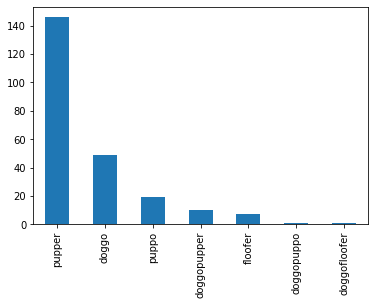

In [54]:
#plotting the dog stage frequency
master['dog_stage'].value_counts().plot(kind='bar');

#### We cans see that dogs in the pupper stage had the highest frequency

In [151]:
master.groupby('dog_stage')['p1_conf'].mean()

dog_stage
doggo           0.561992
doggofloofer    0.354733
doggopupper     0.831278
doggopuppo      0.321676
floofer         0.609204
pupper          0.650044
puppo           0.708338
Name: p1_conf, dtype: float64

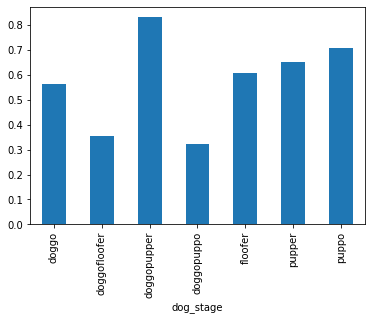

In [152]:
master.groupby('dog_stage')['p1_conf'].mean().plot(kind='bar');

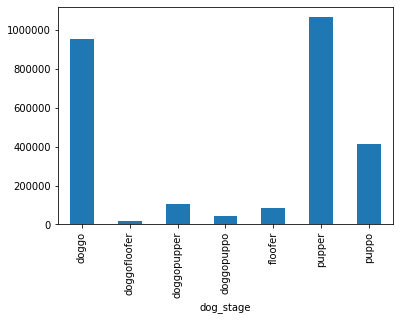

In [142]:
# lets find the dog state with the highest favorite count
master.groupby('dog_stage')['favorite_count'].sum().plot(kind='bar')

#### The dog_state with the highest favorite count is the **pupper**

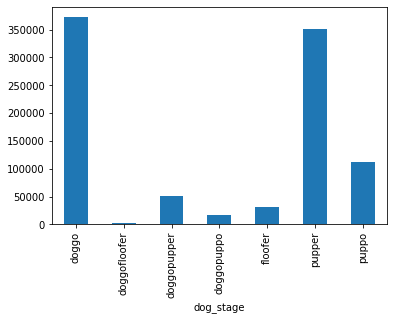

In [144]:
# lets find the dog state with the highest retweet count
master.groupby('dog_stage')['retweet_count'].sum().plot(kind='bar');

#### The dog_state with the highest retwweet count is the **doggo**

In [76]:
#lets check the dog type tha has the highest retweet_count and favorite count
master.sort_values(by=['retweet_count','favorite_count'],ascending=False).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
661,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,77542,155620,labrador_retriever,0.825333,True


In [82]:
master.sort_values(by=['retweet_count','favorite_count'],ascending=False).head(1)['p1']

661    labrador_retriever
Name: p1, dtype: object

### The labrador_retriever has the higest favorite_count

In [81]:
#lets check the dog type tha has the lowest retweet_count and favorite count
master.sort_values(by=['retweet_count','favorite_count']).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
1501,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,NaN,11,70,english_setter,0.298617,True


In [78]:
master.sort_values(by=['retweet_count','favorite_count']).head(1)['p1']

1501    english_setter
Name: p1, dtype: object

#### the english_setter is the dog type with the lowest favorite count

In [84]:
master.sort_values(by=['rating_numerator']).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
1499,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,NaN,60,136,maltese_dog,0.857531,True


In [99]:
master.sort_values(by=['rating_numerator']).head(1)['p1']

1499    maltese_dog
Name: p1, dtype: object

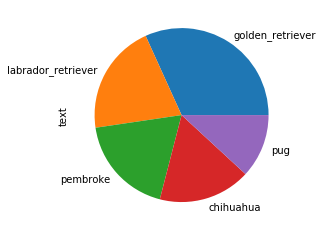

In [127]:
## clecking to see view which type of dog has the rating numerator
master.groupby('p1').count().sort_values(by=['rating_numerator'],ascending=False ).head(5)['text'].plot(kind='pie')